In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/customer_booking.csv", encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
print(len(df))

50000


In [9]:
df.shape

(50000, 14)

In [10]:
df.isna().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


### EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

Which day of the week has the highest bookings

In [12]:
df.flight_day.value_counts()

,count
flight_day,
1,8102
3,7674
2,7673
4,7424
5,6761
7,6554
6,5812


Let's see which days have the highest number of completed bookings to incomplete bookings

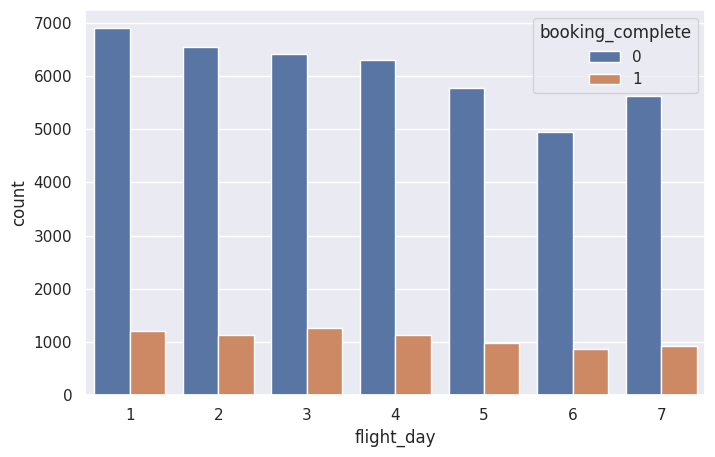

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(x="flight_day", hue="booking_complete", data=df)
plt.savefig(f"{output_dir}/Book day bhvr")
plt.show()

Monday has the highest number of bookings in total but also the highest number of incomplete bookings
Wednesday has the highest number of complete bookings
Saturday has the lowest number of complete bookings

Let's see what the booking behaviour is like based on sales channel

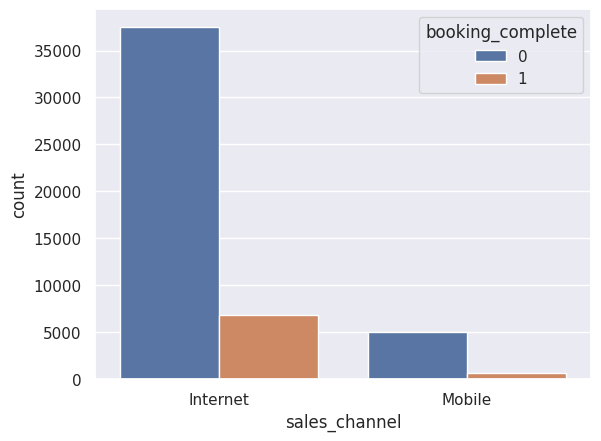

In [51]:
sns.countplot(x="sales_channel", hue="booking_complete", data=df)
plt.savefig(f"{output_dir}/Book channel bhvr")

Let's check the booking behaviour by trip type

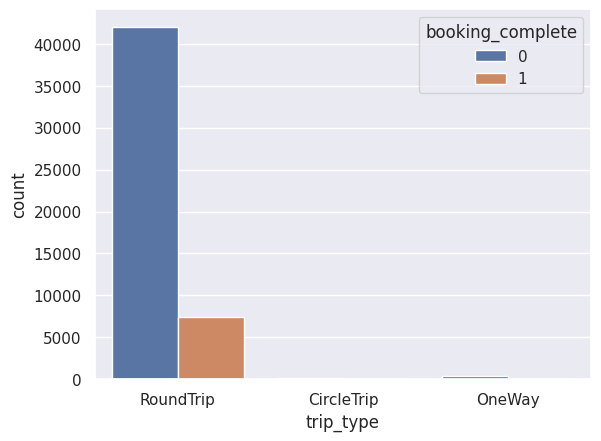

In [50]:
sns.countplot(x="trip_type", hue="booking_complete", data=df)
plt.savefig(f"{output_dir}/trip_type_bhvr")

To check booking behaviour among the top ten countries with the highest bookings

In [16]:
topcountries = df['booking_origin'].value_counts().head(10)
topcountries = topcountries.reset_index()
topcountries.columns = ['Country', 'Count']
topcountries_df = pd.merge(topcountries, df[['booking_origin', 'booking_complete']], left_on='Country', right_on='booking_origin', how='left')
topcountries_df

,Country,Count,booking_origin,booking_complete
0,Australia,17872,Australia,1
1,Australia,17872,Australia,0
2,Australia,17872,Australia,0
3,Australia,17872,Australia,0
4,Australia,17872,Australia,0
...,...,...,...,...
45692,New Zealand,1074,New Zealand,0
45693,New Zealand,1074,New Zealand,0
45694,New Zealand,1074,New Zealand,0
45695,New Zealand,1074,New Zealand,1


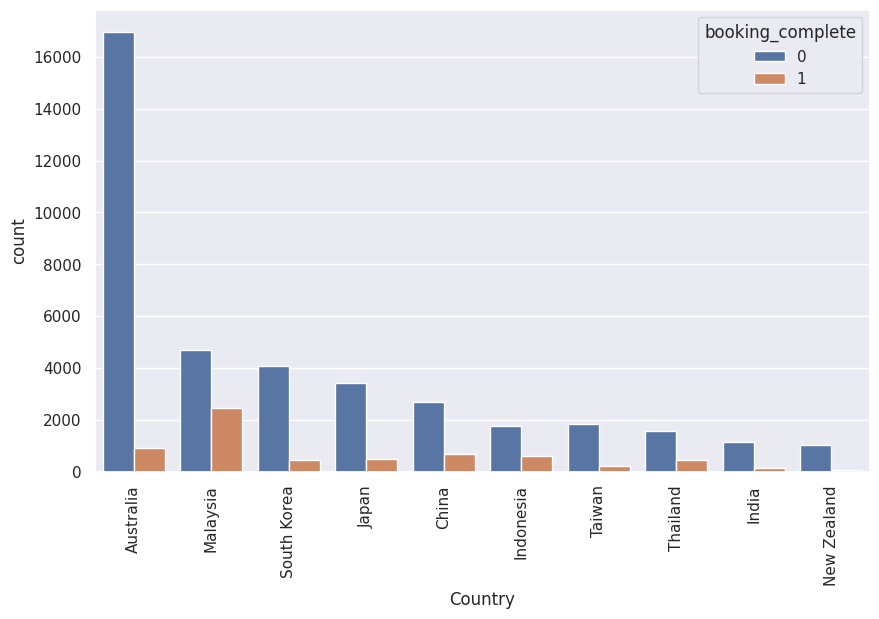

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Country", hue="booking_complete", data=topcountries_df)
plt.xticks(rotation=90)
plt.savefig(f"{output_dir}/Country booking bhvr")
plt.show()

Despite Australia having the highest number of total bookings, Malaysia has a higher number of completed bookings

In [18]:
df['booking_origin'].value_counts().max()

17872

In [19]:
df['trip_type'].value_counts()

,count
trip_type,
RoundTrip,49497
OneWay,387
CircleTrip,116


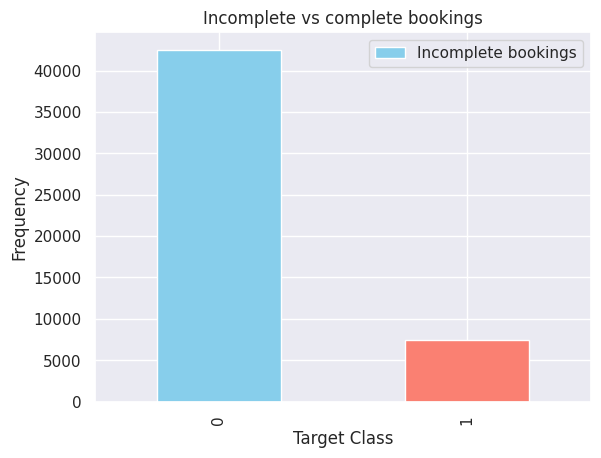

In [56]:
bookCount = df['booking_complete'].value_counts()
bookCount.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Incomplete vs complete bookings')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.legend(['Incomplete bookings', 'Complete bookings'], loc="best", ncol=1)
plt.savefig(f"{output_dir}/TVD")
plt.show()

In [21]:
df['booking_complete'].value_counts()

,count
booking_complete,
0,42522
1,7478


There is a significant imbalance in the target variable ("booking_complete"), we'll see how it affects our model performance

In [22]:
dftemp = df.drop(columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])

Let's check correlations between variables

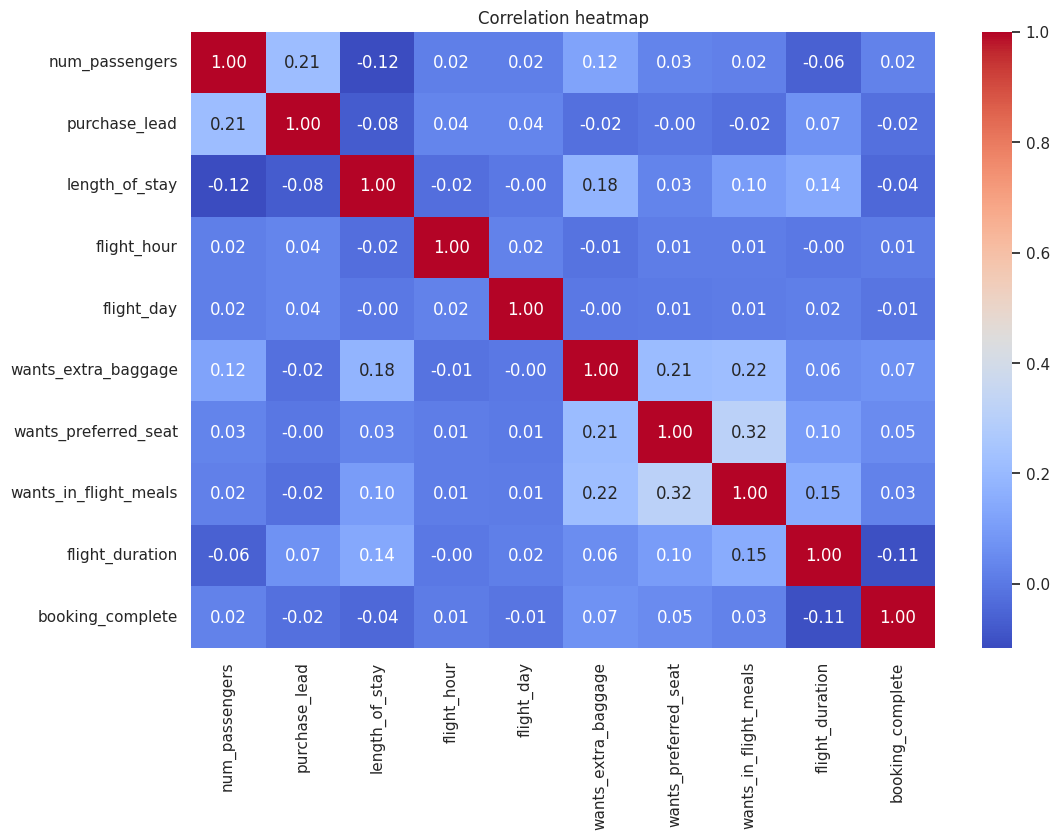

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(dftemp.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap')
plt.savefig(f"{output_dir}/Correlation heatmap")
plt.show()

No strong correlations between variables

###Model Training

Let's train a simple lofistic regression model to serve as a benchmark

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
dfEncoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])

X = dfEncoded.drop(columns=['booking_complete'])
y = dfEncoded['booking_complete']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.8503
0.8523


In [29]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [30]:
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.84955
0.8518


In [31]:
report = classification_report(y_test, log_reg.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.50      0.08      0.14      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.53      0.53     10000
weighted avg       0.81      0.85      0.80     10000



The metrics for complete bookings (class 1) are not good. Let's train Random forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1')

print("Classification Report:")
print(report)
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", cv_scores.mean())

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.14      0.23      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000

Cross-Validation Scores:
[0.1951539  0.18515997 0.19246299 0.1916558  0.23035952]
Mean CV Score: 0.19895843593022405


Similar performance to logistic regression model. Low metrics for class 1 might be due to data imbalance. Check how oversampling class 1 using smote affects model performance

In [33]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [34]:
rf_classifier.fit(X_train_smote, y_train_smote)

y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1')

print("Classification Report:")
print(report)
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", cv_scores.mean())

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8520
           1       0.46      0.23      0.31      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.59      0.61     10000
weighted avg       0.82      0.85      0.82     10000

Cross-Validation Scores:
[0.1951539  0.18515997 0.19246299 0.1916558  0.23035952]
Mean CV Score: 0.19895843593022405


Slight improvement after oversampling. Better recall but slightly lower precision

In [35]:
rf_classifier.score(X_test, y_test)

0.8454

In [36]:
rf_classifier.score(X_train, y_train)

0.999875

In [37]:
rf_classifier.score(X_train_smote, y_train_smote)

0.9999264749132404

Let's check the confusion matrix

In [38]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[8108  412]
 [1134  346]]


In [45]:
import os
output_dir = "/content/Booking analysis"
os.makedirs(output_dir, exist_ok=True)

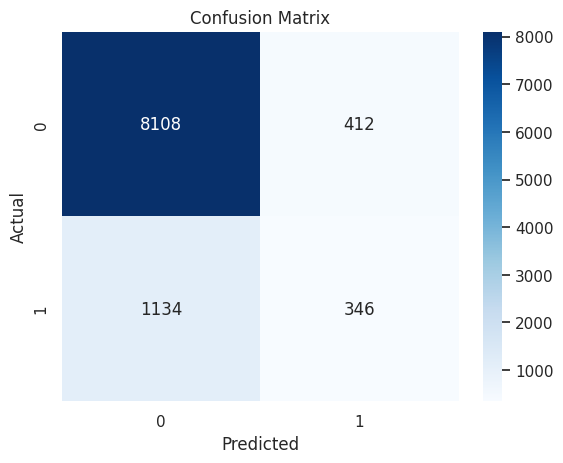

In [46]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(f"{output_dir}/Confusion Matrix for random forest")
plt.show()